## Import Dependencies

In [273]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

## Load Data and Observe Dataset

In [229]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [230]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [231]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Drop NA values

In [234]:
df.dropna(inplace = True)

## Perform basic EDA's and Check Distinct Values of Columns 

In [235]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [236]:
df["Married"].unique()

array(['Yes', 'No'], dtype=object)

In [237]:
df["Dependents"].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [238]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [151]:
df["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [152]:
df["Credit_History"].unique()

array([1., 0.])

In [153]:
df["Property_Area"].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

## Create functions for changing column values into numerical ones alternatively replace can also be used

In [171]:
def Gender_numeric(val):
    return 1 if val ==  "Male" else 0

def Dependents_numeric(val):
    if val ==  "0" :
        return 0
    elif val ==  "1" :
        return 1
    elif val ==  "2" :
        return 2
    elif val ==  "3+" :
        return 3
    
def Married_numeric(val):
    return 1 if val ==  "Yes" else 0

def Education_numeric(val):
    return 1 if val ==  "Graduate" else 0

def Self_Employed_numeric(val):
    return 1 if val ==  "Yes" else 0

def married_numeric(val):
    return 1 if val ==  "Married" else 0


def Property_Area_numeric(val):
    return 1 if val ==  "Urban" else 0

In [155]:
df["Gender"] = df["Gender"].apply(Gender_numeric)

In [156]:
df["Gender"].unique()

array([1, 0], dtype=int64)

In [157]:
df["Dependents"] = df["Dependents"].apply(Dependents_numeric)

In [158]:
df["Dependents"].unique()

array([1, 0, 2, 3], dtype=int64)

In [159]:
df["Married"] = df["Married"].apply(Married_numeric)

In [160]:
df["Married"].unique()

array([1, 0], dtype=int64)

In [164]:
df["Education"] = df["Education"].apply(Education_numeric)

In [165]:
df["Education"].unique()

array([1, 0], dtype=int64)

In [167]:
df["Self_Employed"] = df["Self_Employed"].apply(Self_Employed_numeric)

In [168]:
df["Self_Employed"].unique()

array([0, 1], dtype=int64)

In [172]:
df["Property_Area"] = df["Property_Area"].apply(Property_Area_numeric)

In [173]:
df["Property_Area"].unique()

array([0, 1], dtype=int64)

In [174]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,Y
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,Y


# education & Loan Status
sns.countplot(x= "Education",hue = "Loan_Status",data = df)

<Axes: xlabel='Married', ylabel='count'>

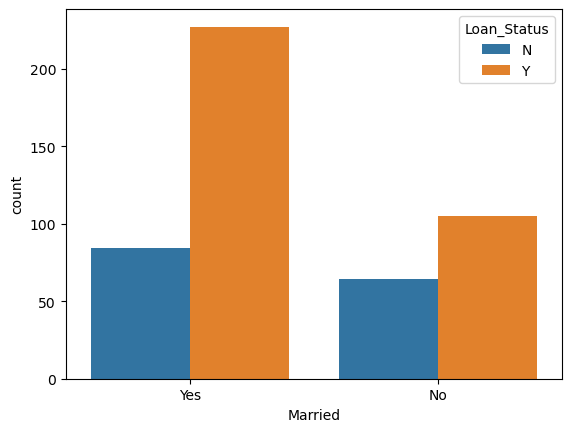

In [279]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

## Loan_ID doesnt provide any actual value for model so it is dropped

In [177]:
df.drop(columns = "Loan_ID",axis =1,inplace = True)

In [178]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,Y
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,Y


## Separate Data and Label

In [189]:
X = df.drop(columns = "Loan_Status", axis = 1)
Y = df["Loan_Status"] 


In [190]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1


In [191]:
Y.head()

1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object

In [192]:
Y.value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

## Split Train and Test

In [193]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,random_state = 0,stratify = Y)

In [196]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(360, 11) (120, 11) (360,) (120,)


## Standardize the data

In [200]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [201]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [214]:
X_train_scaled

array([[ 0.4516784 , -1.3462912 , -0.78069842, ...,  0.23121228,
         0.42465029, -0.68074565],
       [ 0.4516784 ,  0.74278135, -0.78069842, ...,  0.23121228,
         0.42465029, -0.68074565],
       [ 0.4516784 ,  0.74278135,  0.20199889, ...,  0.23121228,
         0.42465029, -0.68074565],
       ...,
       [-2.21396462,  0.74278135, -0.78069842, ...,  0.23121228,
         0.42465029, -0.68074565],
       [ 0.4516784 , -1.3462912 ,  0.20199889, ...,  0.23121228,
         0.42465029, -0.68074565],
       [ 0.4516784 ,  0.74278135, -0.78069842, ...,  0.23121228,
         0.42465029,  1.46897745]])

## Train the Support Vector Machine model

In [261]:
model = SVC()
model.fit(X_train_scaled,Y_train)

SVC()

## Evaluate the train data accuracy

In [262]:
train_sv_predicted = model.predict(X_train_scaled)

In [263]:
train_score =  accuracy_score(train_sv_predicted,Y_train)
train_score

0.8333333333333334

## Evaluate the Test data accuracy

In [264]:
test_sv_predicted = model.predict(X_test_scaled)

In [265]:
test_score =  accuracy_score(test_sv_predicted,Y_test)
test_score

0.8166666666666667